In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
full_data = pd.read_csv('data/housing.csv')

In [3]:
full_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
full_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
full_data.select_dtypes(np.number).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
full_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(full_data[['ocean_proximity']])
feature_names = encoder.get_feature_names_out(input_features=['ocean_proximity'])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=feature_names)
encoded_df.fillna(0, inplace=True)
X_encoded = pd.concat([full_data, encoded_df], axis=1)
X_encoded.drop(['ocean_proximity'], axis=1, inplace=True)
full_data=X_encoded
full_data['total_bedrooms'].interpolate(inplace=True)


In [9]:
full_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [10]:
full_data['bedroom_ratio'] = full_data['total_bedrooms']/full_data['total_rooms']
full_data['house_hold_ratio'] = full_data['households'] / full_data['total_rooms']

In [11]:
full_data['1H OCEAN'] = full_data['ocean_proximity_<1H OCEAN'] 
full_data.drop(['ocean_proximity_<1H OCEAN'],axis=1, inplace=True)

In [12]:
inputs = full_data.drop(['median_house_value', 'ocean_proximity_ISLAND'], axis=1)
targets = full_data['median_house_value']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>],
       [<Axes: title={'center': 'house_hold_ratio'}>,
        <Axes: title={'center': '1H OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

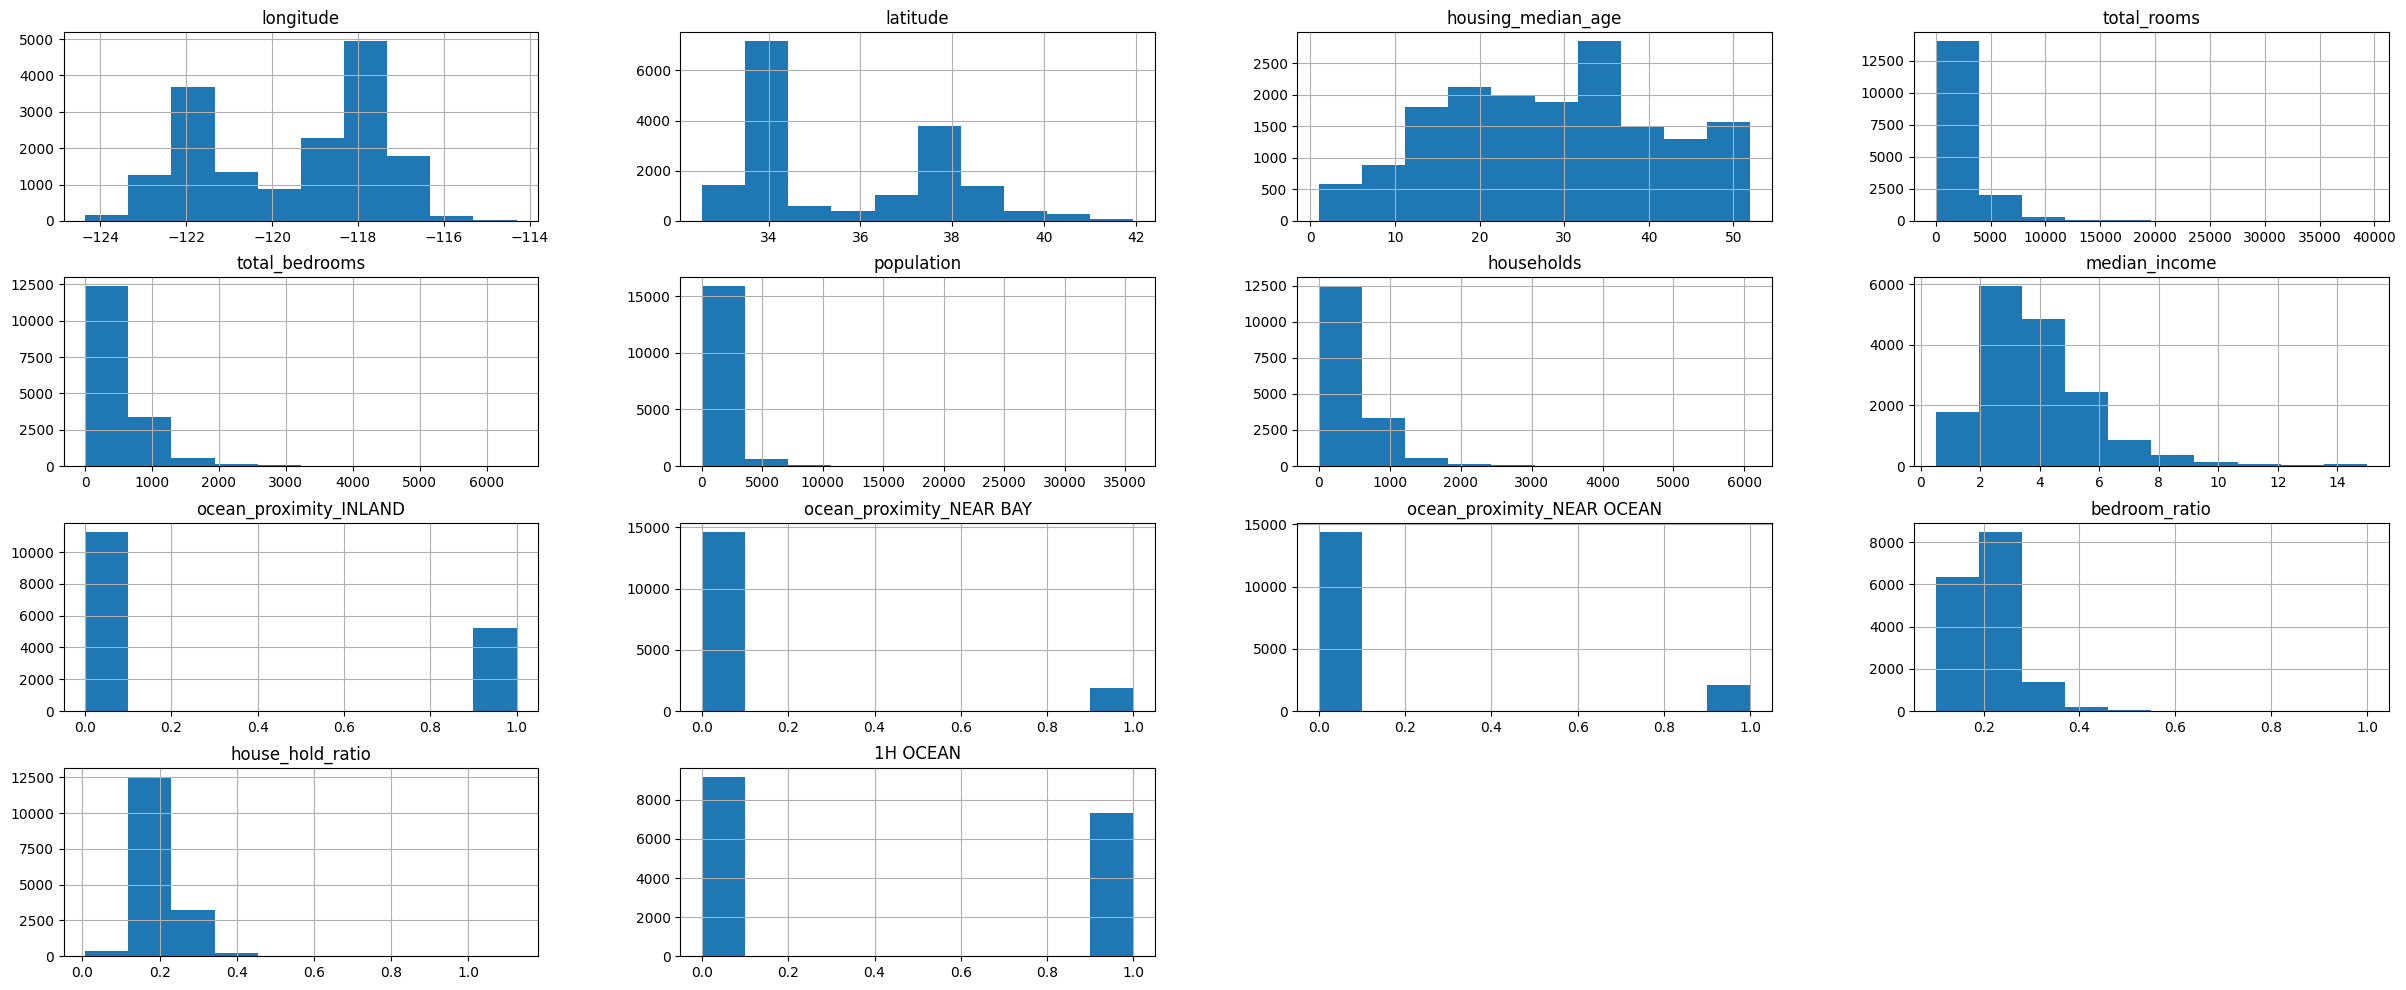

In [14]:
X_train.hist(figsize=(30, 12))

In [15]:
def make_feature_log_form(X) :
    X['total_rooms'] = np.log(X['total_rooms'] + 1)
    X['total_bedrooms'] = np.log(X['total_bedrooms'] + 1)
    X['population'] = np.log(X['population'] + 1)
    X['households'] = np.log(X['households'] + 1)
    return X

In [16]:
X_train = make_feature_log_form(X_train)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,house_hold_ratio,1H OCEAN
14196,-117.03,32.71,33.0,8.047829,6.442540,7.741099,6.436150,3.2596,0.0,0.0,1.0,0.200576,0.199296,0.0
8267,-118.16,33.77,49.0,8.126518,6.669498,7.181592,6.629363,3.8125,0.0,0.0,1.0,0.232703,0.223536,0.0
17445,-120.48,34.66,4.0,7.548556,5.805135,6.820016,5.820083,4.1563,0.0,0.0,1.0,0.174486,0.177122,0.0
14265,-117.11,32.69,36.0,7.259820,5.908083,7.257708,5.874931,1.9425,0.0,0.0,1.0,0.258269,0.249824,0.0
2271,-119.80,36.78,43.0,7.776115,6.068426,6.774224,5.942799,3.5542,1.0,0.0,0.0,0.180940,0.159530,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,0.0,0.0,0.0,0.151128,0.163158,1.0
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,1.0,0.0,0.0,0.184825,0.145590,0.0
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,0.0,0.0,0.0,0.270823,0.250833,1.0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,0.0,0.0,0.0,0.166993,0.156364,1.0


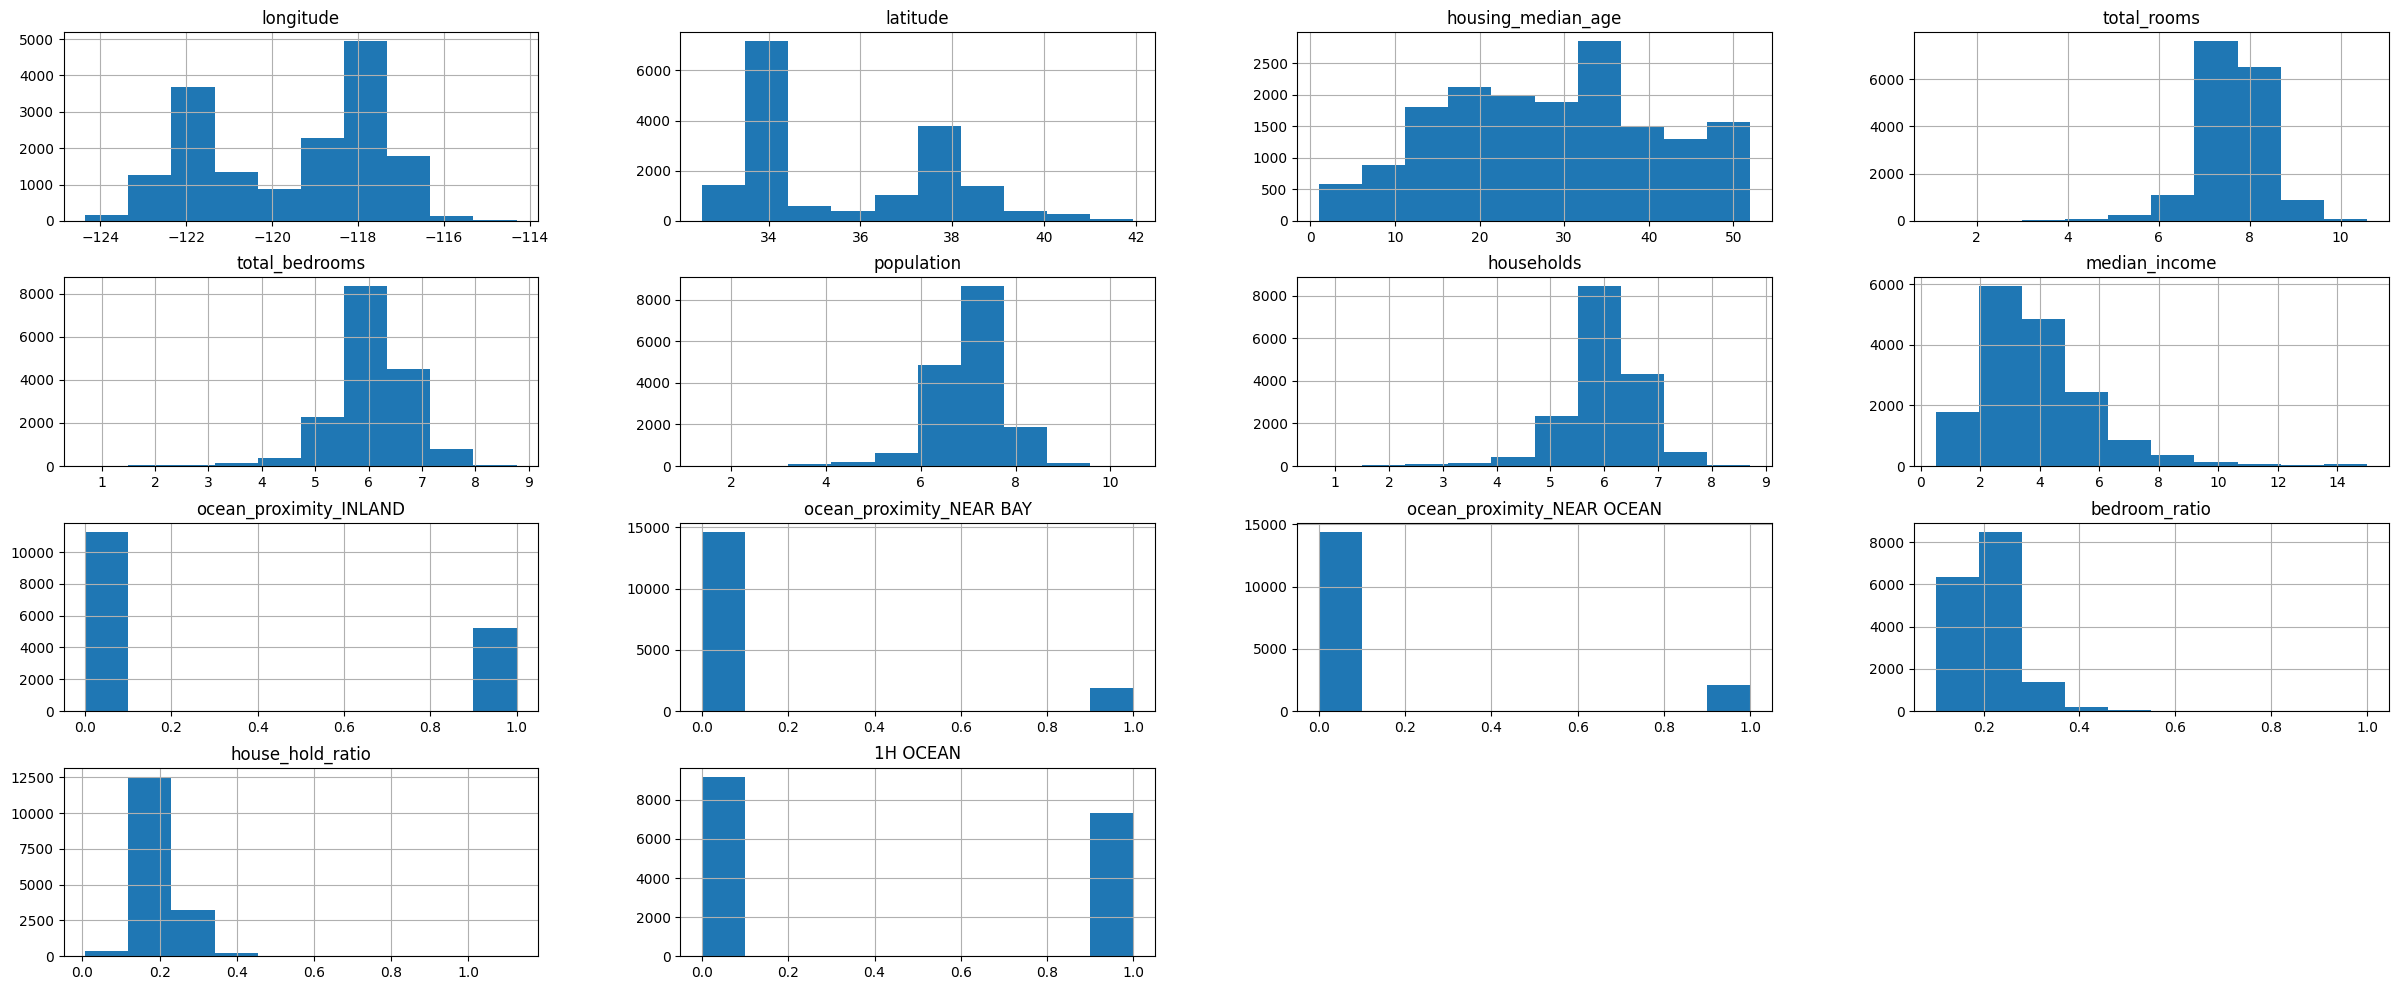

In [17]:
X_train.hist(figsize=(30, 12))
plt.show()

In [18]:
X_test = make_feature_log_form(X_test)
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,house_hold_ratio,1H OCEAN
20046,-119.01,36.06,25.0,7.317212,6.033086,7.239215,5.886104,1.6812,1.0,0.0,0.0,0.276412,0.238538,0.0
3024,-119.46,35.14,30.0,7.987524,6.622736,7.356280,6.371612,2.5313,1.0,0.0,0.0,0.255182,0.198437,0.0
15663,-122.44,37.80,52.0,8.250881,6.438551,7.178545,6.871091,3.4801,0.0,1.0,0.0,0.163055,0.251436,0.0
20484,-118.72,34.28,17.0,8.023552,6.185179,7.441907,6.206576,5.7376,0.0,0.0,0.0,0.158800,0.162242,1.0
9814,-121.93,36.62,34.0,7.763021,6.600551,6.969791,6.061457,3.7250,0.0,0.0,1.0,0.312420,0.182050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,8.060224,6.180017,7.209340,6.115892,4.6050,0.0,0.0,0.0,0.152291,0.142812,1.0
16623,-120.83,35.36,28.0,8.371936,6.787845,7.409136,6.559615,2.7266,0.0,0.0,1.0,0.204950,0.163081,0.0
18086,-122.05,37.31,25.0,8.321665,6.289716,7.368970,6.343880,9.2298,0.0,0.0,0.0,0.130868,0.138166,1.0
2144,-119.76,36.77,36.0,7.827241,6.146329,7.113142,6.163315,2.7850,1.0,0.0,0.0,0.185880,0.189071,0.0


In [19]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,house_hold_ratio,1H OCEAN
20046,-119.01,36.06,25.0,7.317212,6.033086,7.239215,5.886104,1.6812,1.0,0.0,0.0,0.276412,0.238538,0.0
3024,-119.46,35.14,30.0,7.987524,6.622736,7.356280,6.371612,2.5313,1.0,0.0,0.0,0.255182,0.198437,0.0
15663,-122.44,37.80,52.0,8.250881,6.438551,7.178545,6.871091,3.4801,0.0,1.0,0.0,0.163055,0.251436,0.0
20484,-118.72,34.28,17.0,8.023552,6.185179,7.441907,6.206576,5.7376,0.0,0.0,0.0,0.158800,0.162242,1.0
9814,-121.93,36.62,34.0,7.763021,6.600551,6.969791,6.061457,3.7250,0.0,0.0,1.0,0.312420,0.182050,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,8.060224,6.180017,7.209340,6.115892,4.6050,0.0,0.0,0.0,0.152291,0.142812,1.0
16623,-120.83,35.36,28.0,8.371936,6.787845,7.409136,6.559615,2.7266,0.0,0.0,1.0,0.204950,0.163081,0.0
18086,-122.05,37.31,25.0,8.321665,6.289716,7.368970,6.343880,9.2298,0.0,0.0,0.0,0.130868,0.138166,1.0
2144,-119.76,36.77,36.0,7.827241,6.146329,7.113142,6.163315,2.7850,1.0,0.0,0.0,0.185880,0.189071,0.0


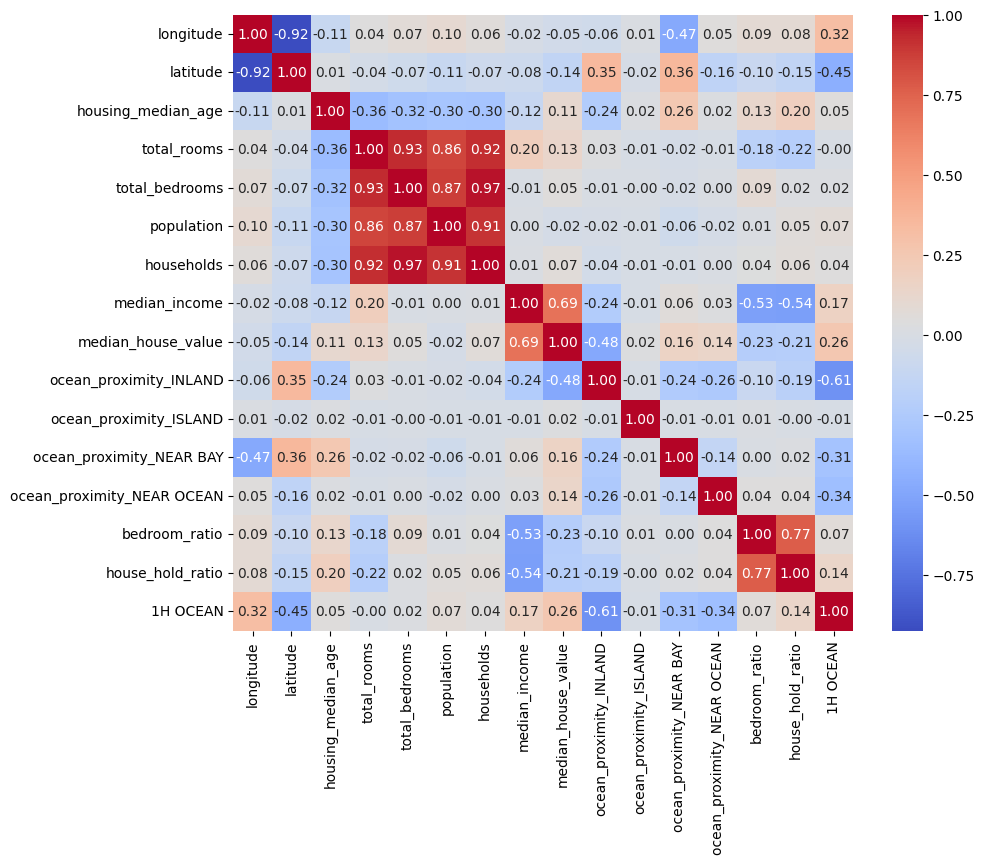

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(full_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
def calculate_accracy(pred, targets) :
    loss = mean_squared_error(targets, pred)
    print("RMSE Loss : ", loss)
    r2 = r2_score(targets, pred)
    print("Accuracy is : ", r2)
    

In [25]:
pred = model.predict(X_train)
calculate_accracy(pred, y_train)

RMSE Loss :  4341284481.985645
Accuracy is :  0.6752427258539508


In [26]:
pred = model.predict(X_test)

In [27]:
calculate_accracy(pred, y_test)

RMSE Loss :  5427148889.255755
Accuracy is :  0.58584312383595


In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)


In [29]:
model = RandomForestRegressor(random_state = 42, n_estimators=100).fit(X_train, y_train)

In [30]:
pred = model.predict(X_train)

In [31]:
calculate_accracy(pred, y_train)

RMSE Loss :  334232528.90803725
Accuracy is :  0.9749971591427549


In [32]:
pred = model.predict(X_test)
calculate_accracy(pred, y_test)

RMSE Loss :  2510390297.3892736
Accuracy is :  0.8084269614239643


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
}

In [35]:
model = RandomForestRegressor(random_state = 42)

In [36]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


In [37]:
# pred = grid_search.predict(X_train)

In [38]:
# pred = grid_search.predict(X_test)

In [39]:
calculate_accracy(pred, y_test)

RMSE Loss :  2510390297.3892736
Accuracy is :  0.8084269614239643


In [40]:
from sklearn.tree import DecisionTreeRegressor

def calculate_correct_depth(md):
    model = DecisionTreeRegressor(random_state=42, max_depth=md).fit(X_train, y_train)
    pred = model.predict(X_train)
    train_r2 = r2_score(y_train, pred)
    pred = model.predict(X_test)
    test_r2 = r2_score(y_test, pred)
    return {"depth": md, "Train Accuracy": train_r2, "Test Accuracy": test_r2}

In [41]:
out_put = [calculate_correct_depth(i) for i in range(1,20)]

In [42]:
out_put

[{'depth': 1,
  'Train Accuracy': 0.3169966266359021,
  'Test Accuracy': 0.27951121634638165},
 {'depth': 2,
  'Train Accuracy': 0.4980040366339661,
  'Test Accuracy': 0.4739346216205189},
 {'depth': 3,
  'Train Accuracy': 0.572324180700269,
  'Test Accuracy': 0.5497397650029802},
 {'depth': 4,
  'Train Accuracy': 0.6099949113903148,
  'Test Accuracy': 0.5842407277702115},
 {'depth': 5,
  'Train Accuracy': 0.6464143929017674,
  'Test Accuracy': 0.6019087829646321},
 {'depth': 6,
  'Train Accuracy': 0.685170834444868,
  'Test Accuracy': 0.6385323133188747},
 {'depth': 7,
  'Train Accuracy': 0.7223672997289072,
  'Test Accuracy': 0.6633088454411682},
 {'depth': 8,
  'Train Accuracy': 0.7566693679811906,
  'Test Accuracy': 0.6747373446713273},
 {'depth': 9,
  'Train Accuracy': 0.790154573428862,
  'Test Accuracy': 0.6860338780694824},
 {'depth': 10,
  'Train Accuracy': 0.821023031365398,
  'Test Accuracy': 0.684349898695456},
 {'depth': 11,
  'Train Accuracy': 0.8539877191503615,
  'Test 

In [43]:
import xgboost as xgb

In [44]:
model = xgb.XGBRegressor(random_state=42).fit(X_train, y_train)

In [45]:
pred = model.predict(X_train)

In [46]:
calculate_accracy(pred, y_train)

RMSE Loss :  765909949.8874215
Accuracy is :  0.9427047850471646


In [47]:
pred = model.predict(X_test)

In [48]:
calculate_accracy(pred, y_test)

RMSE Loss :  2342404152.8548
Accuracy is :  0.8212463290659641


In [49]:
from sklearn.model_selection import KFold

In [108]:
models = []

def train_model_kfold(X_train, train_targets, X_val, val_targets, **params):
    model = xgb.XGBRegressor(random_state=42, n_jobs=-1, n_estimators = 140, **params)
    model.fit(X_train, train_targets)
    pred = model.predict(X_train)
    loss = mean_squared_error(train_targets, pred, squared=False)
    train_r2 = r2_score(train_targets, pred)
    print("Train Accuracy is:", train_r2 * 100)
    print("Training RMSE Loss:", loss)
    pred = model.predict(X_val)
    test_r2 = r2_score(val_targets, pred)
    loss = mean_squared_error(val_targets, pred, squared=False)
    print("Validation Accuracy is:", test_r2 * 100)
    print("Validation RMSE Loss:", loss)
    return model

kfold = KFold(n_splits=5, shuffle=True)

eta = 0.3
for train_index, test_index in kfold.split(X_train):
    X_train_fold, train_targets_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_val_fold, val_targets_fold = X_train.iloc[test_index], y_train.iloc[test_index]
    models.append(train_model_kfold(X_train_fold, train_targets_fold, X_val_fold, val_targets_fold))

def predict_avg(models, inputs):
    predictions = [model.predict(inputs).flatten() for model in models]
    return np.mean(predictions, axis=0)

pred = predict_avg(models, X_test)


Train Accuracy is: 96.57799118767771
Training RMSE Loss: 21395.148393290077
Validation Accuracy is: 82.09654358455126
Validation RMSE Loss: 48855.879659846345
Train Accuracy is: 96.54564441061679
Training RMSE Loss: 21596.454009042634
Validation Accuracy is: 81.90024690852142
Validation RMSE Loss: 48185.17039562185
Train Accuracy is: 96.65127761391884
Training RMSE Loss: 21034.983484488326
Validation Accuracy is: 82.32130403924458
Validation RMSE Loss: 49714.472793975816
Train Accuracy is: 96.43584428502965
Training RMSE Loss: 21739.079240407827
Validation Accuracy is: 84.18816663830867
Validation RMSE Loss: 46713.71404059081
Train Accuracy is: 96.54171355194376
Training RMSE Loss: 21596.811047738513
Validation Accuracy is: 82.91371114616774
Validation RMSE Loss: 46928.45932032107


In [109]:
test_r2 = r2_score(y_test, pred)
print("Test R-squared Score:", test_r2)

Test R-squared Score: 0.8401736678137276


# MODEL ACCURACY  :   83.97

In [114]:
def test_XGBRegressor(**params) : 
    model = xgb.XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, y_train)
    return model
    

In [237]:
pred = test_XGBRegressor(n_estimators = 150, learning_rate = 0.2, booster='gblinear').predict(X_test)

In [236]:
test_r2 = r2_score(y_test, pred)
print("Test R-squared Score:", test_r2)

Test R-squared Score: 0.8324307319136415
